<a href="https://colab.research.google.com/github/pappuyadav/image-similarity/blob/main/image_comaprision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.14

(1, 4096)
(1, 4096)
0.32423675060272217
(0.10418350661449514, 2.326583866167368e-11)


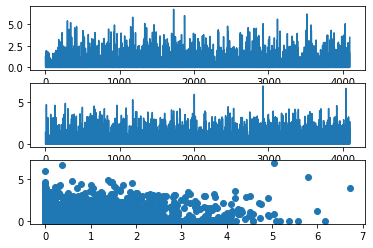

In [ ]:
# Compare similarity between two images by using VGG16 as a feature extractor and cosine similarity as a distance metric
# Author: Pappu Kumar Yadav
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from pickle import dump
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from scipy import spatial
from scipy.stats import f_oneway

# load an image from file
image1 = load_img('/content/reference_image.jpg', target_size=(224, 224))
image2 = load_img('/content/compare_image.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
image1 = img_to_array(image1)
image2 = img_to_array(image2)
# reshape data for the VGG16 model
image1 = image1.reshape((1, image1.shape[0], image1.shape[1], image1.shape[2]))
image2 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
# prepare the image for the VGG16 model
image1 = preprocess_input(image1)
image2 = preprocess_input(image2)
# load model
model = VGG16()
# remove the output layer so as to use VGG16 as feature extractor and not as a classifier
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# get extracted features
features1 = model.predict(image1)
features2 = model.predict(image2)
print(features1.shape)
print(features2.shape)


def image_similarity(vector1, vector2):
  result = 1 - spatial.distance.cosine(vector1, vector2)
  return result


fig, plot_num = plt.subplots(3)
plot_num[0].plot(features1[0])
plot_num[1].plot(features2[0])
plot_num[2].scatter(features1[0],features2[0])


aa=image_similarity(features1,features2)
print(aa)
bb=stats.pearsonr(features1[0],features2[0])
print(bb)


# save to file
dump(features1, open('features1.pkl', 'wb'))
dump(features2, open('features2.pkl', 'wb'))

with open('/content/features1.pkl', 'rb') as f:
  data1 = pickle.load(f)
with open('/content/features2.pkl', 'rb') as f:
  data2 = pickle.load(f)

with open("features1.txt", "wb") as abc:
  abc.write(data1)
with open("features2.txt", "wb") as abc:
  abc.write(data2)